<center> 
    <a href="https://www.visual-layer.com" target="_blank" rel="noopener noreferrer">
    <picture>
    <source media="(prefers-color-scheme: dark)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo_dark_mode.png" width=200>
    <source media="(prefers-color-scheme: light)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png" width=200>
    <img alt="vl logo." src="https://raw.githubusercontent.com/visual-layer/fastdup/main/gallery/visual_layer_logo.png" width=400>
    </picture>
    </a><br>
    <a href="https://github.com/visual-layer/fastdup" target="_blank" style="text-decoration: none;"> GitHub </a> •
    <a href="https://discord.com/invite/Dqw458EG/" target="_blank" style="text-decoration: none;"> Join Discord Community </a> •
    <a href="https://visual-layer.readme.io/discuss" target="_blank" style="text-decoration: none;"> Discussion Forum </a>
</center>

<center> 
    <a href="https://medium.com/visual-layer" target="_blank" style="text-decoration: none;"> Blog </a> •
    <a href="https://visual-layer.readme.io/" target="_blank" style="text-decoration: none;"> Documentation </a> •
    <a href="https://visual-layer.com/about" target="_blank" style="text-decoration: none;"> About Us </a> 
</center>


<br>

<center> 
<div style="text-align: center; margin-top:50px;">
    <a href="https://visual-layer.com/" style="padding:10px;">
                <img alt="site" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/web.png" width="50"></a>
    <a href="https://medium.com/visual-layer" style="padding:10px;">
                <img alt="blog" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/forum.png" width="50"></a>
    <a href="https://github.com/visual-layer/fastdup" style="padding:10px;">
                <img alt="github" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/github.png" width="50"></a>
    <a href="https://discord.com/invite/Dqw458EG/" style="padding:10px;">
                <img alt="slack" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/discord.png" width="50"></a>
    <a href="https://www.linkedin.com/company/visual-layer/" style="padding:10px;">
                <img alt="linkedin" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/linkedin.png" width="50"></a>
    <a href="https://www.youtube.com/@visual-layer" style="padding:10px;">
                <img alt="youtube" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/youtube.png" width="50"></a>
    <a href="https://twitter.com/visual_layer" style="padding:10px;">
                <img alt="twitter" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/x.png" width="50"></a>
</div>
</center>

# Finding and Removing Duplicates

[![Open in Colab](https://img.shields.io/badge/Open%20in%20Colab-blue?style=for-the-badge&logo=google-colab&labelColor=gray)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/quickstart.ipynb)
[![Open in Kaggle](https://img.shields.io/badge/Open%20in%20Kaggle-blue?style=for-the-badge&logo=kaggle&labelColor=gray)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/quickstart.ipynb)
[![Explore the Docs](https://img.shields.io/badge/Explore%20the%20Docs-blue?style=for-the-badge&labelColor=gray&logo=read-the-docs)](https://visual-layer.readme.io/docs/quickstart)

This notebook shows how to quickly analyze an image dataset for potential issues using [fastdup](https://github.com/visual-layer/fastdup). We'll take you on a high-level tour showcasing the core functions of fastdup in the shortest time.

By the end of this notebook, you will learn how to find out if your dataset has issues such as:

+ Broken images.
+ Duplicates/near-duplicates.
+ Outliers.
+ Dark/bright/blurry images.

We'll also visualize clusters of visually similar images to provide a bird's-eye view and help you understand the data's structure for further analysis.

## Installation
First, let's start with the installation:

> ✅ **Tip** - If you're new to fastdup, we encourage you to run the notebook in [Google Colab](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb) or [Kaggle](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/quick-dataset-analysis.ipynb) for the best experience. If you'd like to just view and skim through the notebook, we recommend viewing using [nbviewer](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb).  



In [ ]:
!pip install fastdup -Uq

Now, test the installation by printing out the version. If there's no error message, we are ready to go!

In [1]:
import fastdup
fastdup.__version__

'2.0.17'

## Download Dataset

For demonstration, we will use a generally curated [Oxford IIIT Pet dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/). Feel free to swap this dataset with your own.

The dataset consists of images and annotations for 37 category pets with roughly 200 images for each class. 

> 🗒 **Note** - fastdup works on both unlabeled and labeled images. But for now, we are only interested in finding issues in the images and not the annotations. 
> If you're interested in finding annotation issues, head to:
> + 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb)
> + 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb).


Let's download only from the dataset and extract them into the local directory:

In [ ]:
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz -O images.tar.gz
!tar xf images.tar.gz

## Run fastdup

Once the extraction completes, we can run fastdup on the images.

For that let's initialize fastdup and specify the input directory which points to the folder of images.

In [2]:
fd = fastdup.create(input_dir="images/")


fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "images"
Work directory is set to "work_dir"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation [link].



> 🗒 **Note** - The `.create` method also has an optional `work_dir` parameter which specifies the directory to store artifacts from the run.

In other words you can run `fastdup.create(input_dir="images/", work_dir="my_work_dir/")` if you'd like to store the artifacts in a `my_work_dir`.

Now, let's run fastdup.

In [14]:
fd.run()

fastdup By Visual Layer, Inc. 2024. All rights reserved.


Done: 100%|██████████████████████████████████████████████| 3/3 [01:20<00:00, 26.86s/it]


Analysis complete. Use the .explore() function to interactively explore your data on your local machine.

Alternatively, you can generate HTML-based galleries.
For more information, use help(fastdup) or check our documentation [link].



0

## View Run Summary

After the run is completed, you can optionally view the summary with:

In [15]:
fd.summary()


 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 7390 images
    Valid images are 99.92% (7,384) of the data, invalid are 0.08% (6) of the data
    For a detailed analysis, use `.invalid_instances()`.

    Components:  failed to find images clustered into components, try to run with lower cc_threshold.
    Outliers: 6.14% (454) of images are possible outliers, and fall in the bottom 5.00% of similarity values.
    For a detailed list of outliers, use `.outliers()`.



['Dataset contains 7390 images',
 'Valid images are 99.92% (7,384) of the data, invalid are 0.08% (6) of the data',
 'For a detailed analysis, use `.invalid_instances()`.\n',
 'Components:  failed to find images clustered into components, try to run with lower cc_threshold.',
 'Outliers: 6.14% (454) of images are possible outliers, and fall in the bottom 5.00% of similarity values.',
 'For a detailed list of outliers, use `.outliers()`.\n']

## Invalid Images
From the summary above, we see there are a few invalid images. These are broken images that cannot be read.

You can get a list of broken images with:

In [5]:
fd.invalid_instances()

,filename,index,error_code,is_valid,fd_index
136,images/Abyssinian_34.jpg,136,ERROR_CORRUPT_IMAGE,False,136
1042,images/Egyptian_Mau_139.jpg,1042,ERROR_CORRUPT_IMAGE,False,1042
1049,images/Egyptian_Mau_145.jpg,1049,ERROR_CORRUPT_IMAGE,False,1049
1070,images/Egyptian_Mau_167.jpg,1070,ERROR_CORRUPT_IMAGE,False,1070
1079,images/Egyptian_Mau_177.jpg,1079,ERROR_CORRUPT_IMAGE,False,1079
1095,images/Egyptian_Mau_191.jpg,1095,ERROR_CORRUPT_IMAGE,False,1095


## Duplicate/Near-duplicates

One of the lowest hanging fruits in cleaning a dataset is finding and eliminating duplicates.

fastdup provides a handy way of visualizing duplicates/near-duplicates using the `duplicates_gallery` method. The `Distance` value indicates how visually similar are the image pairs in the gallery. A `Distance` of `1.0` indicates an exact copy and vice-versa.

Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored similarity visual view in  work_dir/galleries/duplicates.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



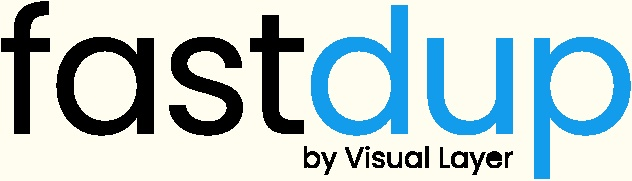
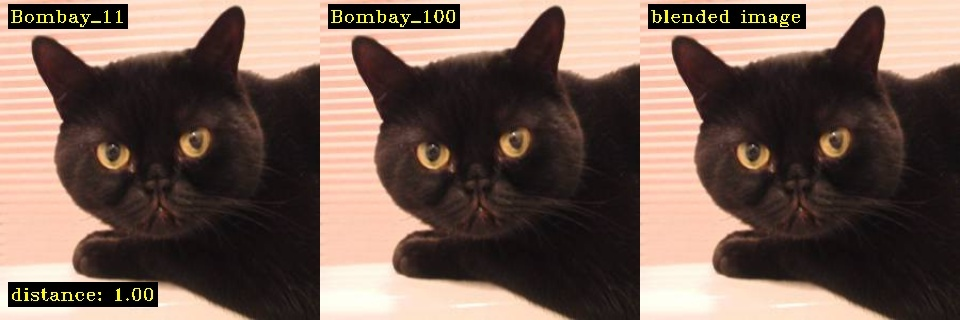
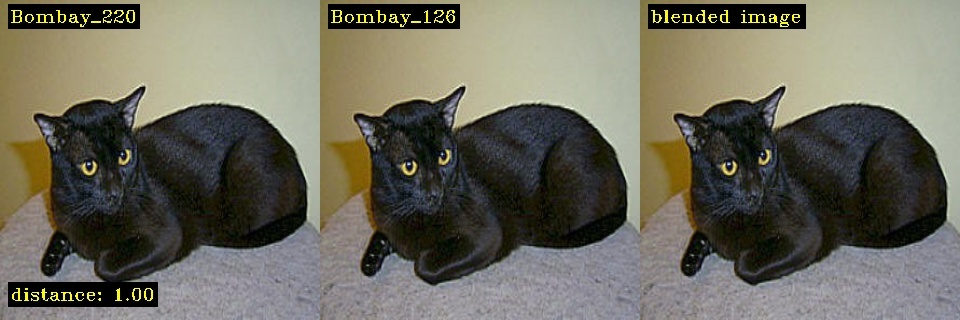
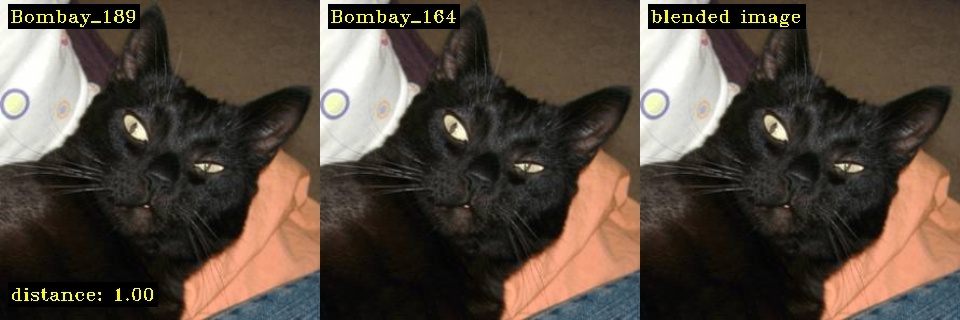
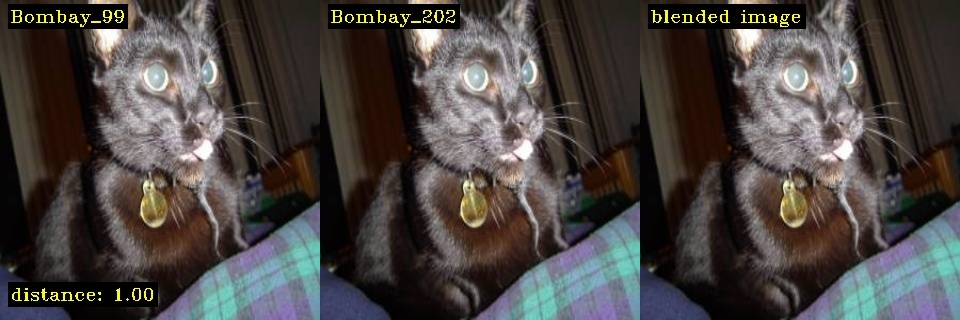
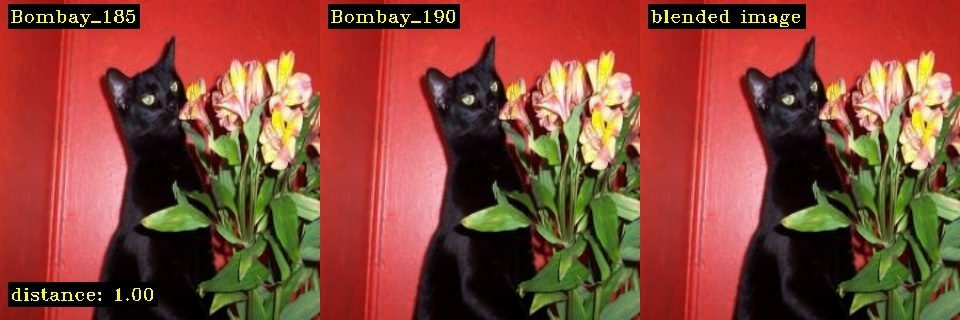
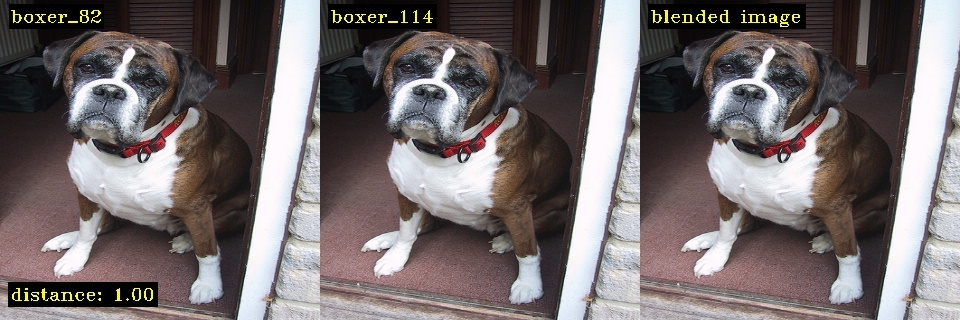
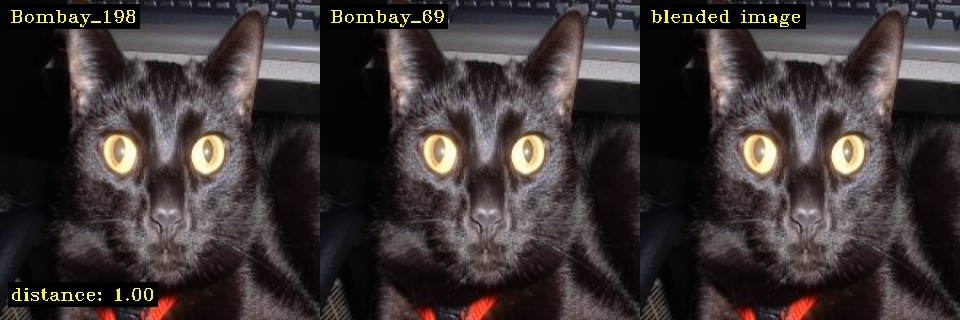
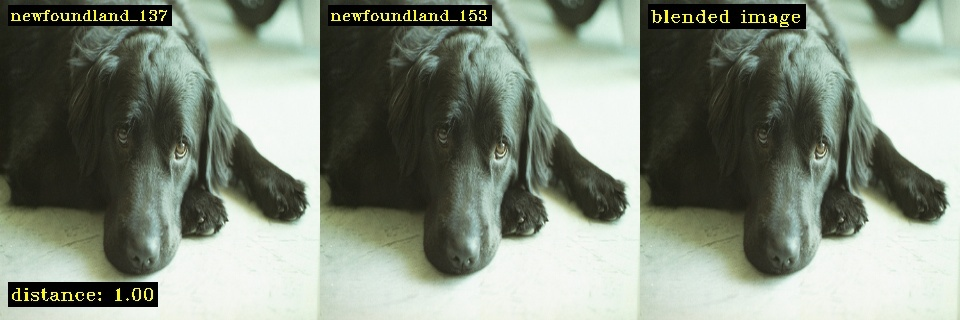
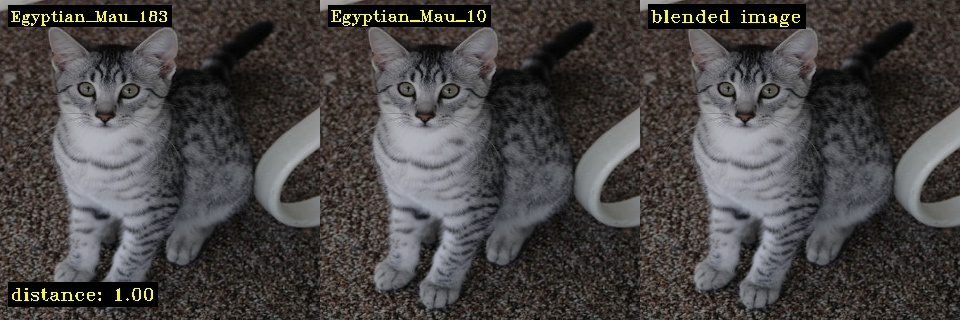
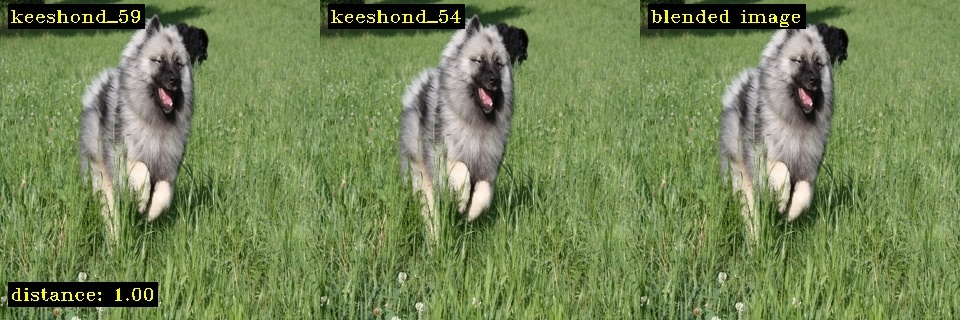
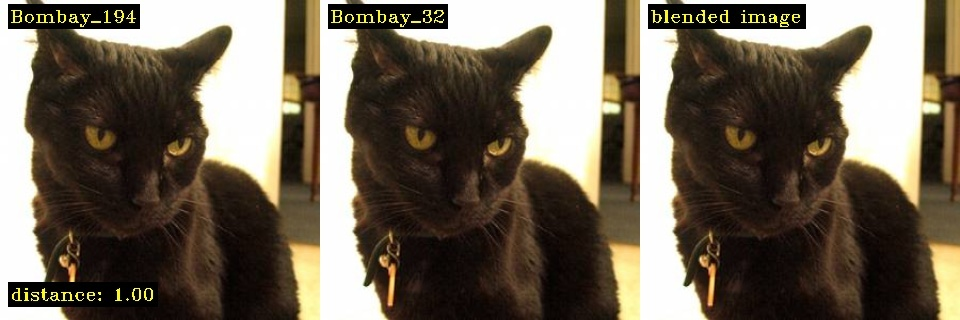
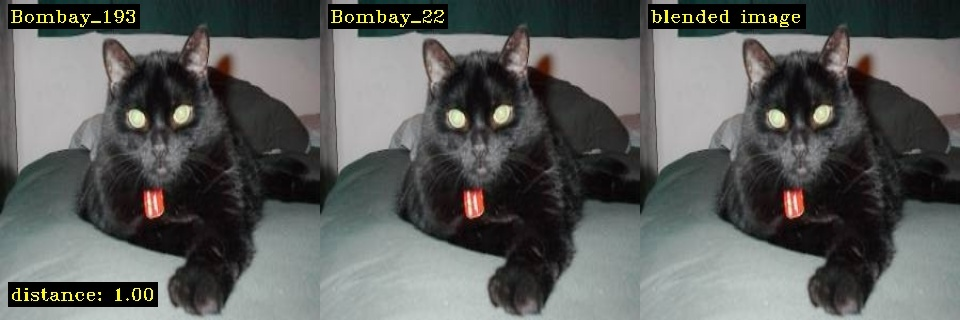
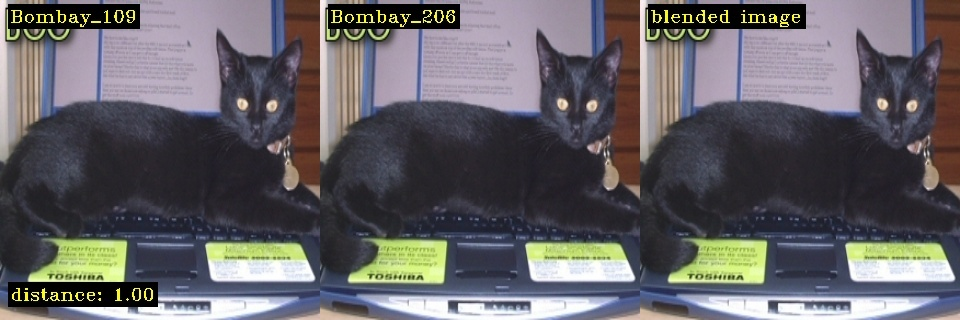
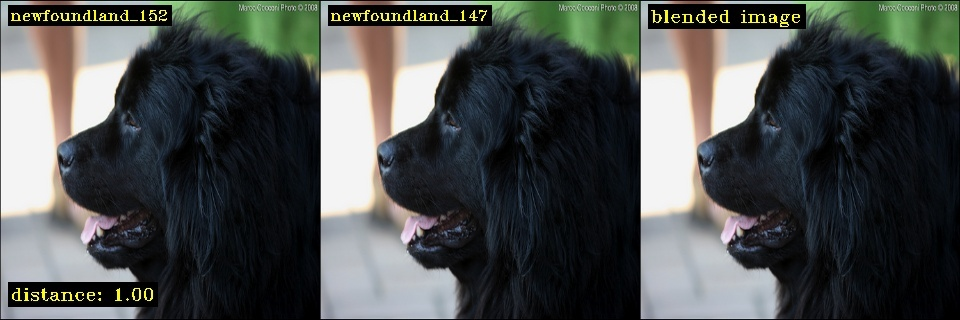
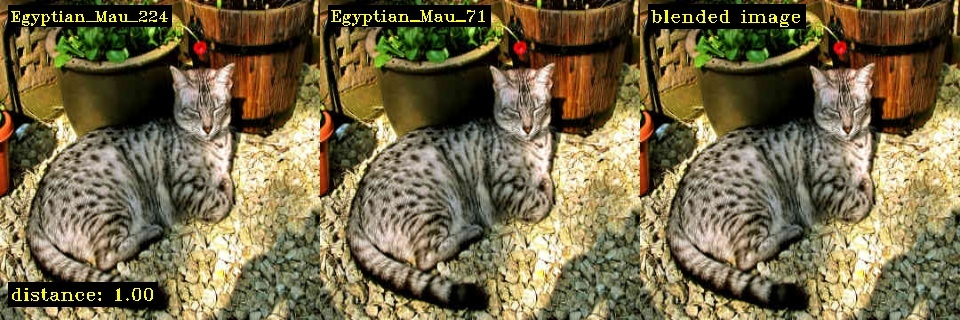

0

In [6]:
fd.vis.duplicates_gallery()

## Removing Duplicates

## Interactive Exploration
In addition to the static visualizations presented above, fastdup also offers interactive exploration of the dataset.

To explore the dataset and issues interactively in a browser, run:

In [ ]:
fd.explore()

> 🗒 **Note** - This currently requires you to sign-up (for free) to view the interactive exploration. Alternatively, you can visualize fastdup in a non-interactive way using fastdup's built in galleries shown in the upcoming cells.

You'll be presented with a web interface that lets you conveniently view, filter, and curate your dataset in a web interface.


![image.png](https://vl-blog.s3.us-east-2.amazonaws.com/fastdup_assets/cloud_preview.gif)

## Wrap Up

That's a wrap! In this notebook we showed how you can run fastdup on a dataset or any folder of images. 

We've seen how to use fastdup to find:

+ Broken images.
+ Duplicate/near-duplicates.
+ Outliers.
+ Dark, bright and blurry images.
+ Image clusters.

Next, feel free to check out other tutorials -

+ ⚡ [**Quickstart**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb): Learn how to install fastdup, load a dataset and analyze it for potential issues such as duplicates/near-duplicates, broken images, outliers, dark/bright/blurry images, and view visually similar image clusters. If you're new, start here!
+ 🧹 [**Clean Image Folder**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb): Learn how to analyze and clean a folder of images from potential issues and export a list of problematic files for further action. If you have an unorganized folder of images, this is a good place to start.
+ 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb): Learn how to load a labeled image classification dataset and analyze for potential issues. If you have labeled ImageNet-style folder structure, have a go!
+ 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb): Learn how to load bounding box annotations for object detection and analyze for potential issues. If you have a COCO-style labeled object detection dataset, give this example a try. 

As usual, feedback is welcome! Questions? Drop by our [Slack channel](https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email) or open an issue on [GitHub](https://github.com/visual-layer/fastdup/issues).


<center> 
<div style="text-align: center; margin-top:50px;">
    <a href="https://visual-layer.com/" style="padding:10px;">
                <img alt="site" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/web.png" width="50"></a>
    <a href="https://medium.com/visual-layer" style="padding:10px;">
                <img alt="blog" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/forum.png" width="50"></a>
    <a href="https://github.com/visual-layer/fastdup" style="padding:10px;">
                <img alt="github" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/github.png" width="50"></a>
    <a href="https://discord.com/invite/Dqw458EG/" style="padding:10px;">
                <img alt="slack" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/discord.png" width="50"></a>
    <a href="https://www.linkedin.com/company/visual-layer/" style="padding:10px;">
                <img alt="linkedin" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/linkedin.png" width="50"></a>
    <a href="https://www.youtube.com/@visual-layer" style="padding:10px;">
                <img alt="youtube" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/youtube.png" width="50"></a>
    <a href="https://twitter.com/visual_layer" style="padding:10px;">
                <img alt="twitter" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/x.png" width="50"></a>
</div>
<br>
<div style="text-align:center; font-family:'DM Sans',sans-serif; font-style:italic; font-size:12px; max-width:600px; margin: 20px auto auto;">
    <img style="width:200px" alt="logo" src="https://d2iycffepdu1yp.cloudfront.net/design-assets/VL_horizontal_logo.png" width=300>
    <div style="margin-top:20px;">Copyright © 2024 Visual Layer. All rights reserved.</div>
</div>

</center> 